# CNN Exercise With Cats or Dogs Dataset

In this exercise you will have to build a CNN image classification model that can classify an image as cat or dog. You will be using the [cats vs dogs tensorflow dataset](https://www.tensorflow.org/datasets/catalog/cats_vs_dogs) to train your model.

# Implementing Convolutional Neural Networks

## Import Libraries

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import random

## Load, Split, and Resize the Dataset

Train Dataset Size: 23262


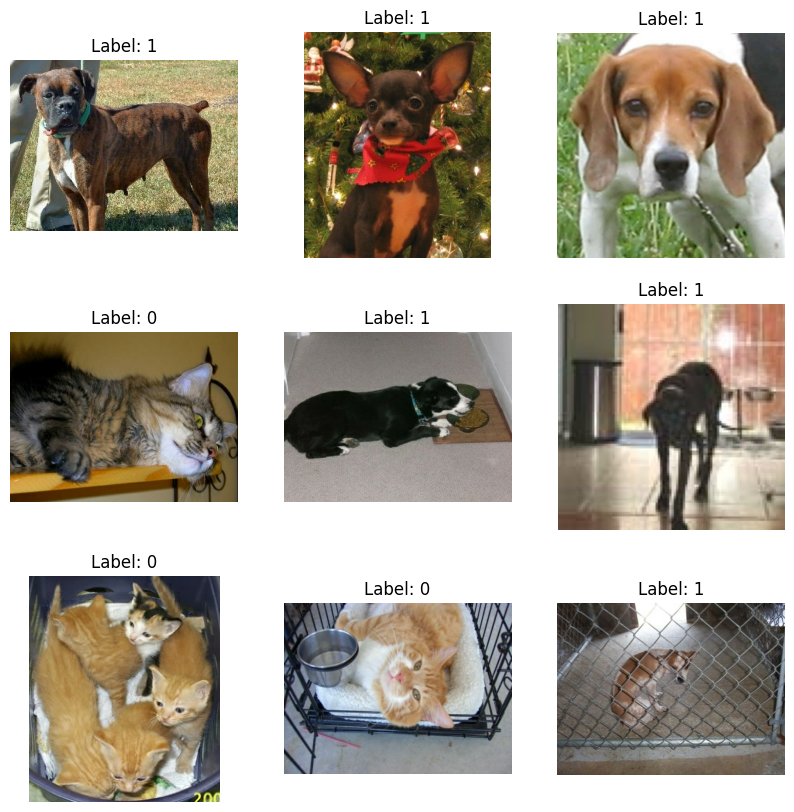

In [ ]:
IMAGE_WIDTH = 300
IMAGE_HEIGHT = 300

# load and split data
(train_ds, test_ds), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:75%]', 'train[75%:]'],  # Specify the split percentages
    as_supervised=True,  # Ensure images and labels are paired
    with_info=True  # Include dataset information
)

# Print some information about the dataset
print(f"Train Dataset Size: {ds_info.splits['train'].num_examples}")

# Visualize some training images
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(f"Label: {label.numpy()}")
    plt.axis('off')
plt.show()

## Resize and Normalize the Dataset

In [ ]:
# the images are too big so resize the dataset
def preprocess(image, label):
  # Resize and normalize the image
  image = tf.image.resize(image, (IMAGE_HEIGHT, IMAGE_HEIGHT)) / 255.0  # Adjust size as needed
  return image, label

train_ds = train_ds.map(preprocess).batch(32)
test_ds = test_ds.map(preprocess).batch(32)

## Design the Neural Network



In [ ]:
# create the model
model = tf.keras.models.Sequential([
    # 1st convolutional layer
    # filters = 64, kernek_size = (3, 3), activation='relu', input_shape = equal to the shpae of training images
    # MaxPooling2D 2 x 2
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # 2nd convolutional layer
    # filters = 64, kernek_size = (3, 3), activation='relu'
    # MaxPooling2D 2 x 2

    # 3rd convolutional layer
    # filters = 64, kernek_size = (3, 3), activation='relu'
    # MaxPooling2D 2 x 2

    # 4th convolutional layer
    # filters = 64, kernek_size = (3, 3), activation='relu'
    # MaxPooling2D 2 x 2

    # 5th convolutional layer
    # filters = 16, kernek_size = (3, 3), activation='relu'
    # MaxPooling2D 2 x 2

    # flatten the results to feed into a DNN

    # 64 neuron hidden dense layer

    # only one neuron dense layer and use sigmoid activation because we are only dealing with binary classification
])

## Exploring the Convolutional Neural Network

You can inspect your model using the model.summary command.

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_220 (Conv2D)         (None, 298, 298, 64)      1792      
                                                                 
 max_pooling2d_220 (MaxPool  (None, 149, 149, 64)      0         
 ing2D)                                                          
                                                                 
 conv2d_221 (Conv2D)         (None, 147, 147, 64)      36928     
                                                                 
 max_pooling2d_221 (MaxPool  (None, 73, 73, 64)        0         
 ing2D)                                                          
                                                                 
 conv2d_222 (Conv2D)         (None, 71, 71, 64)        36928     
                                                                 
 max_pooling2d_222 (MaxPool  (None, 35, 35, 64)      

## Compile the Model

Compile the model with the following configuration:

```python
loss='binary_crossentropy'

optimizer='adam'

metrics=['accuracy']
```

## Train the Model

If you want to train the model longer try removing the callback.

In [ ]:
# custom keras callback
class KerasCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > 0.95:
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

# create the callback
callback = KerasCallback()

# fit the model
history = model.fit(train_ds, validation_data=test_ds, epochs=50, callbacks=[callback])

Epoch 1/50
546/546 [==============================] - 76s 129ms/step - loss: 0.6897 - accuracy: 0.5356 - val_loss: 0.6768 - val_accuracy: 0.5808
Epoch 2/50
546/546 [==============================] - 67s 122ms/step - loss: 0.6407 - accuracy: 0.6336 - val_loss: 0.5667 - val_accuracy: 0.7020
Epoch 3/50
546/546 [==============================] - 68s 124ms/step - loss: 0.5413 - accuracy: 0.7299 - val_loss: 0.5015 - val_accuracy: 0.7534
Epoch 4/50
546/546 [==============================] - 78s 143ms/step - loss: 0.4635 - accuracy: 0.7827 - val_loss: 0.4208 - val_accuracy: 0.8059
Epoch 5/50
546/546 [==============================] - 68s 125ms/step - loss: 0.4052 - accuracy: 0.8169 - val_loss: 0.4121 - val_accuracy: 0.8177
Epoch 6/50
546/546 [==============================] - 78s 143ms/step - loss: 0.3644 - accuracy: 0.8375 - val_loss: 0.3554 - val_accuracy: 0.8449
Epoch 7/50
546/546 [==============================] - 68s 125ms/step - loss: 0.3234 - accuracy: 0.8585 - val_loss: 0.3364 - val_ac

## Learning Curve

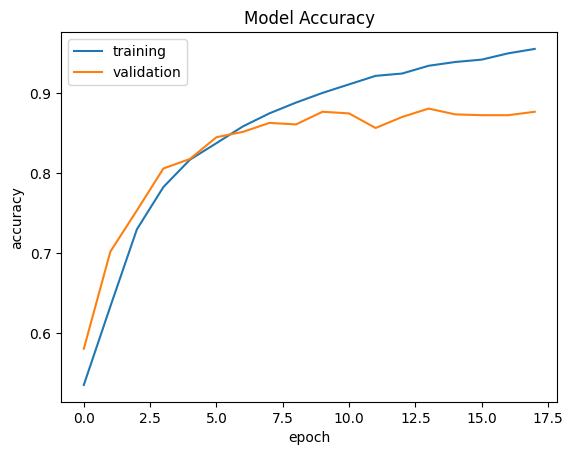

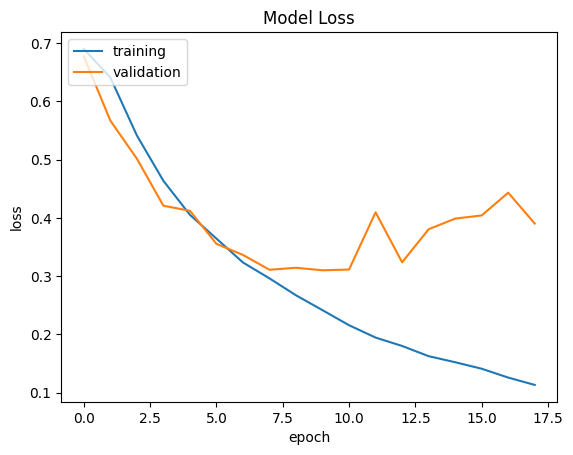

In [ ]:
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
vavlidation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# plot training accuracy and validation accuracy
plt.plot(training_accuracy)
plt.plot(validation_accuracy)
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

# plot training loss and validation loss
plt.plot(training_loss)
plt.plot(vavlidation_loss)
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

## Inference / Prediction

In [ ]:
import pathlib
import urllib.request
import zipfile
from google.colab import files


# function for prediction / inference
def predict_cat_or_dog(image_name, img_array):
  img_array = tf.expand_dims(img_array, 0) # Create a batch
  classes = model.predict(img_array)
  result = classes[0]

  if result > 0.5:
    print(f'{result} | {image_name} is a dog!')
  else:
    print(f'{result} | {image_name} is a cat!')

# download images
actual_images_dl = 'https://drive.google.com/uc?export=download&id=1uTks_8b50_R4XAvOsCa7thWx4F35oI-L'
filename = "cad_actual_samples.zip"
dir = 'cad_actual_samples'

urllib.request.urlretrieve(actual_images_dl, filename)

# extract to directory
zip_ref = zipfile.ZipFile(filename, 'r')
zip_ref.extractall(dir)
zip_ref.close()

1/1 [==============================] - 0s 20ms/step
[1.] | dog1.jpg is a dog!


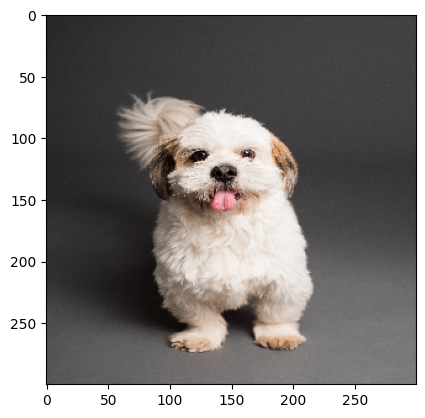

In [ ]:
# load the image to test
image_name = 'dog1.jpg'
img_array = tf.keras.utils.load_img(f'{dir}/{image_name}', target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))
plt.imshow(img_array)
predict_cat_or_dog(image_name, img_array)

1/1 [==============================] - 0s 24ms/step
[0.] | cat1.jpg is a cat!


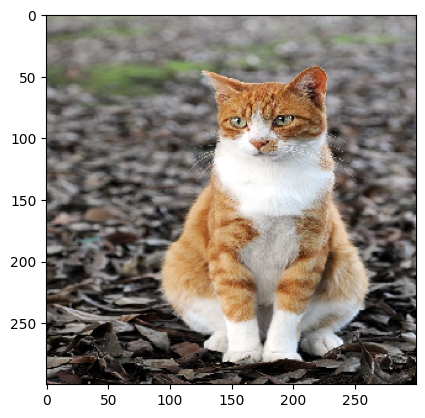

In [ ]:
# load the image to test
image_name = 'cat1.jpg'
img_array = tf.keras.utils.load_img(f'{dir}/{image_name}', target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))
plt.imshow(img_array)
predict_cat_or_dog(image_name, img_array)

1/1 [==============================] - 0s 23ms/step
[1.] | dog2.jpg is a dog!


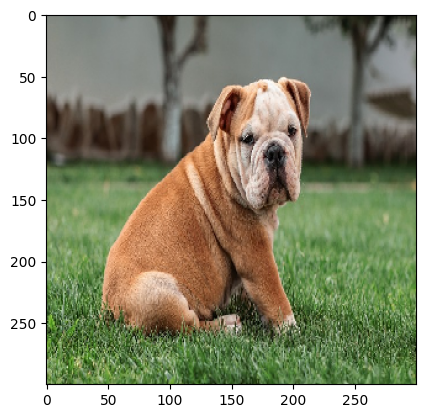

In [ ]:
# load the image to test
image_name = 'dog2.jpg'
img_array = tf.keras.utils.load_img(f'{dir}/{image_name}', target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))
plt.imshow(img_array)
predict_cat_or_dog(image_name, img_array)

1/1 [==============================] - 0s 22ms/step
[0.] | cat2.jpg is a cat!


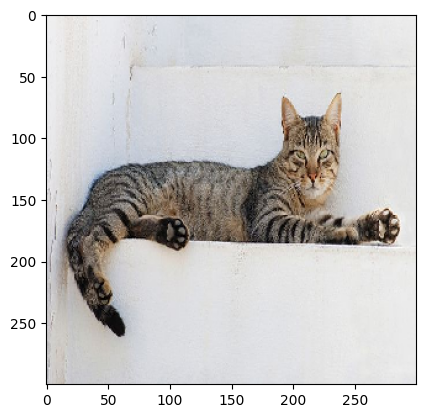

In [ ]:
# load the image to test
image_name = 'cat2.jpg'
img_array = tf.keras.utils.load_img(f'{dir}/{image_name}', target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))
plt.imshow(img_array)
predict_cat_or_dog(image_name, img_array)

1/1 [==============================] - 0s 22ms/step
[1.] | dog3.jpg is a dog!


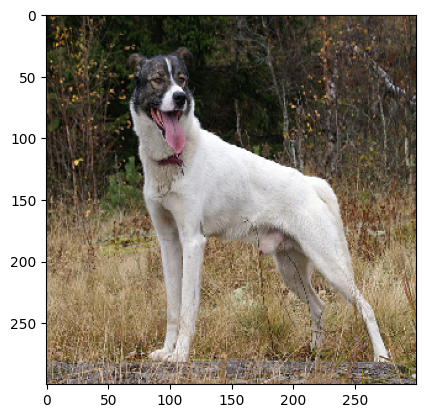

In [ ]:
# load the image to test
image_name = 'dog3.jpg'
img_array = tf.keras.utils.load_img(f'{dir}/{image_name}', target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))
plt.imshow(img_array)
predict_cat_or_dog(image_name, img_array)

1/1 [==============================] - 0s 22ms/step
[3.8330866e-29] | puss.webp is a cat!


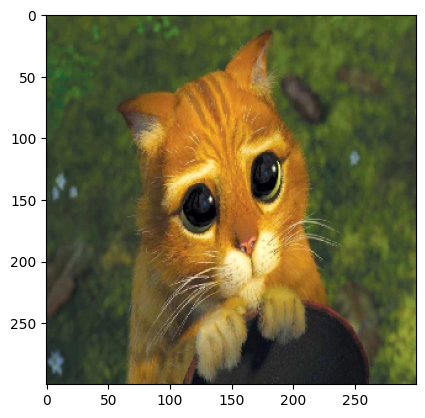

In [ ]:
# load the image to test
image_name = 'puss.webp'
img_array = tf.keras.utils.load_img(f'{dir}/{image_name}', target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))
plt.imshow(img_array)
predict_cat_or_dog(image_name, img_array)

Saving beagle-hound-dog.webp to beagle-hound-dog.webp
1/1 [==============================] - 0s 21ms/step
[1.] | beagle-hound-dog.webp is a dog!


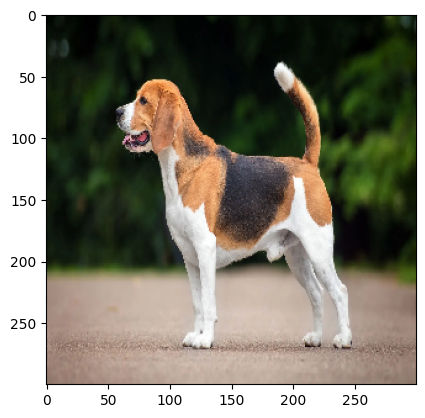

In [ ]:
# upload your own image to test
uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))
  plt.imshow(img)
  predict_cat_or_dog(fn, img)